# 📘 k-Nearest Neighbors (KNN) Regression

## 📖 1. What Is KNN Regression?

KNN regression is a **non-parametric** method that predicts the value of a target variable by averaging the outcomes of the **k nearest neighbors** in the feature space.

---

## 🧠 Prediction Rule

Given a query point $ x $, KNN regression predicts:

$$
\hat{y}(x) = \frac{1}{k} \sum_{i \in \mathcal{N}_k(x)} y_i
$$

Where:
- $ \mathcal{N}_k(x) $ are the indices of the $ k $ nearest neighbors of $ x $
- Distance is typically Euclidean

---

## ⚙️ Hyperparameters

- **k**: number of neighbors (larger → smoother predictions)
- **Distance metric**: usually Euclidean, but others possible
- **Weighting**: uniform (equal weight) vs. distance-based

---

## ✅ Characteristics

| Feature           | KNN Regression          |
|------------------|-------------------------|
| Type              | Non-parametric          |
| Flexibility       | High (captures nonlinearity) |
| Interpretability  | Low                     |
| Training time     | Fast (lazy learning)    |
| Prediction time   | Slow (requires distance computation) |




## Simulated data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
sns.set(style='whitegrid')

np.random.seed(0)
X = np.sort(np.random.rand(100, 1), axis=0)
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.1, 100)
X_test = np.linspace(0, 1, 200).reshape(-1, 1)

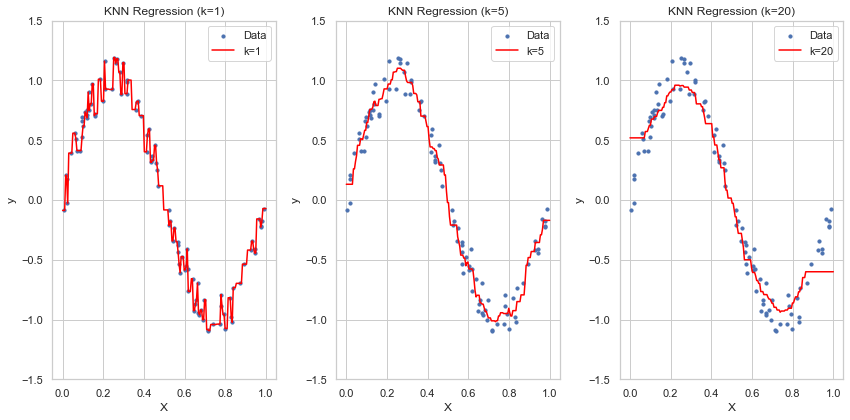

In [2]:
# Try different values of k
plt.figure(figsize=(12, 6))
for i, k in enumerate([1, 5, 20], 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X_test)

    plt.subplot(1, 3, i)
    plt.scatter(X, y, s=10, label='Data')
    plt.plot(X_test, y_pred, color='red', label=f'k={k}')
    plt.ylim(-1.5, 1.5)
    plt.title(f'KNN Regression (k={k})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
plt.tight_layout()
plt.show()

## 🏠 Real Data Example: California Housing

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and split
cal = fetch_california_housing()
X_real = cal.data
y_real = cal.target
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Fit and evaluate
knn_real = KNeighborsRegressor(n_neighbors=6)
knn_real.fit(X_train_scaled, y_train)
y_pred_real = knn_real.predict(X_test_scaled)
print("R^2:", r2_score(y_test, y_pred_real))
print("MSE:", mean_squared_error(y_test, y_pred_real))

R^2: 0.6725469856328306
MSE: 0.4290973699787851


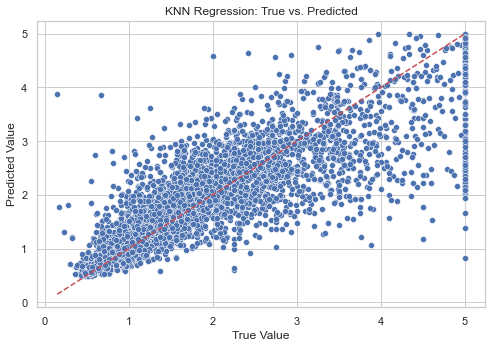

In [12]:
# Plot predictions
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_real)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.title("KNN Regression: True vs. Predicted")
plt.tight_layout()
plt.show()